# Lending Club Case Study

### Problem Statement
In this case study, we use EDA to understand how consumer attributes and loan attributes influence the tendency of default. <br><br> The dataset `loan.csv` contains information about past loan applicants and whether they ‘defaulted’ or not. <br><b><i>The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.</i></b><br>

<br>When a person applies for a loan, there are two types of decisions that could be taken by the company:
> **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:<br>
> - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)<br>
> - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.<br>
> - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.<br>

> **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Since we are dealing with a large dataset, we can increase the columns displayed by pandas for the sake of readability

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
# #increasing max number of columns displayed with pandas.
# pd.set_option('display.max_columns', 150)

### Reading the data

In [3]:
# df = pd.read_csv("drive/MyDrive/Colab Notebooks/UpGrad MLAI/Lending Club Case Study/loan.csv")
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


### Understanding the Data

In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


#### Identifying the target variable
The problem statement provides us with a dataset consisting of only approved loans in the past. They are then categorized as either *Fully Paid*, *Charged off* or *Current*.<br> So we can assume that users who have Fully Paid off their debts are preferrable and those that have been Charged off are red flags.<br>This gives us enough reason to choose this field as our target variable to identify potential defaulters.<br>*Note. since borrowers who are currently paying off their loans (i.e. in the 'current' category) can't be classified as a potential defaulter or not, we can choose to ignore this field and drop it.*

In [7]:
df = df[~(df["loan_status"]=='Current')]
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


We have successfully identified the target variable

In [8]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

looks like there are several columns with all-null values, <br> lets find the percentage of missing values

In [9]:
round(df.isnull().sum()/len(df.index), 3)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

Several columns have entirely null values, since we cannot infer anything from them, lets remove them.

#### remove all-null colums

In [10]:
all_null_columns = [x for x in df if df[x].isna().sum() == df.shape[0]]
print("All-Null columns: ", all_null_columns)

All-Null columns:  ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'tota

In [11]:
df.drop(all_null_columns, inplace=True, axis=1)

In [12]:
round(df.isnull().sum()/len(df.index), 2)*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.00
emp_length                    3.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.00
purpose                       0.00
title                         0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

we notice that there are still several columns with a lot of null values. <br> Lets Analyse them individually.

- `emp_title` and `emp_length` specify the job title supplied by the borrower when applying for loan and the employment length respectively.
- `desc` privides a description of the nature of the loan provided by the borrower. **However, since deriving any insights from this data would require sentiment analysis, we will drop it for now**
- `mths_since_last_delinq` provides the number of months since the borrowers last delinquecy.
 - note that this is usually `null` for a large majority of any given sample.
 - This also makes it a good metric to keep an eye on, as past delinquents tend to regress. 
 - **However, due to the lack of data in this field, we cannot come to accurate conclusions that best describe the given dataset. Hence, we drop this column as well.**
- `mths_since_last_record` is the number of months since the borrowers last public record. 
  - **This field has over 90% missing values, we may not be able to derive relevant information. We'll drop this column.**

In [13]:
df.drop(["desc", "mths_since_last_delinq", "mths_since_last_record"], inplace=True, axis=1)

In [14]:
round(df.isnull().sum()/len(df.index), 3)*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.20
emp_length                   2.70
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.00
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal     

Let's have a look at the number of values each field can take, this can help us identify categorical variables

In [15]:
df[df.columns].nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                    

we notice that columns `id`, `member_id` and `url` have as many unique values as the number of rows. Since they can all be used as identifiers, we can choose to use any one. <br> We'll use the `id` field as the identifier and drop the others.

In [16]:
df.drop(["url", "member_id"], inplace=True, axis=1)

Let's see if there are any more columns we can remove<br>

The objective is to detemine the predictive variables. Those that may impact the target variable `Loan_Status`<br>We notice that there are several types of variables<br>
 - those that are related to the borrower that can influence their overall probability of paying off the loan. These include employment details, age, etc.
 - those that describe the nature of the loan, such as amount, interest, purpose, etc.
 - and those that are generated after the loan is processed. Something like the next payment date, etc. Since these cannot be derived until after the loan is processed, they can be dropped.

Let's remove the single valued columns

In [17]:
df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
out_prncp_inv                 1
out_prncp                     1
term                          2
loan_status                   2
pub_rec_bankruptcies          3
verification_status           3
dtype: int64

In [18]:
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths'], axis = 1, inplace = True)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,...,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,...,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
5,1075269,5000,5000,5000.00,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16


In [19]:
df.drop([
    'delinq_2yrs', 
    'earliest_cr_line', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'revol_bal', 
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_prncp',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt          38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  float64
 4   term                 38577 non-null  object 
 5   int_rate             38577 non-null  object 
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  object 
 8   sub_grade            38577 non-null  object 
 9   emp_title            36191 non-null  object 
 10  emp_length           37544 non-null  object 
 11  home_ownership       38577 non-null  object 
 12  annual_inc           38577 non-null  float64
 13  verification_status  38577 non-null  object 
 14  issue_d              38577 non-null  object 
 15  loan_status          38577 non-null 

`int rate` defines the interest rate of the applied loan. This is expected to be a numerical value, yet it is defined as an Object. <br> Let's see why

In [21]:
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

Looks like the values are suffixed with a '%' symbol<br>Let's remove the '%' and convert it to the type float

In [22]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')


> #### `term` is defined as an object but it consists of numerical values.


In [23]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

 since it only consists of values 36 or 60, it can be considered a catagorical variable, we can leave it as is.

In [24]:
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Let's replace the 'NONE' field and categorize it wit 'OTHER' for easy interpretation.

In [25]:
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

#### Format some of the other columns. We can use them to derive other potential columns

In [26]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')

We can derive the months and years of issued month and earliest cr line

In [27]:
df['MonthIssued'] = df.issue_d.dt.month
df['YearIssued'] = df.issue_d.dt.year

In [28]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

long term loans to clear short term ones. clear year long loans at EOY <br> forecasting potential salary, pay higher interests initially to compensate


### Univariate Analysis

Let's first have a look at the target variable

In [29]:
df.int_rate.describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

A majority of the loans are fully paid off

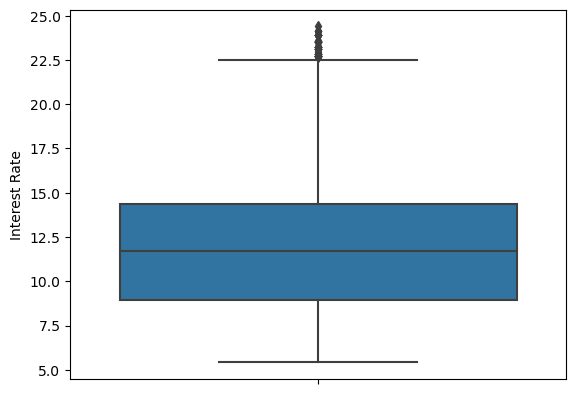

In [30]:
sns.boxplot( y=df["int_rate"] )
plt.ylabel('Interest Rate')
plt.show()

Interest rate vary from 9% to 14%. Mean of the Interst rate is 11.7%. Max interest rate is 24.4%

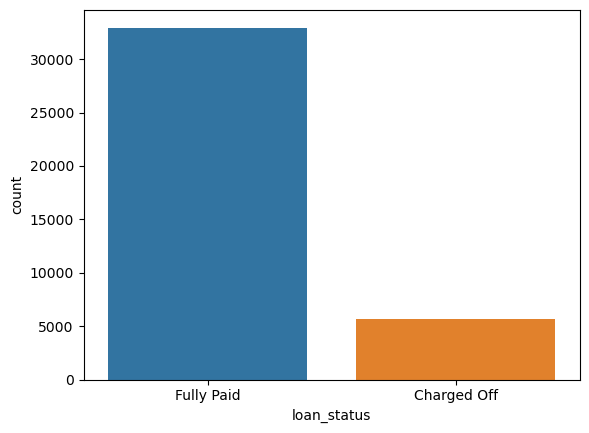

In [31]:
sns.countplot(x= df["loan_status"])
plt.show()

In [32]:
(df.loan_status.value_counts()/df.shape[0])*100

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

most of the loan are fully paid and only 14% are defaulted.

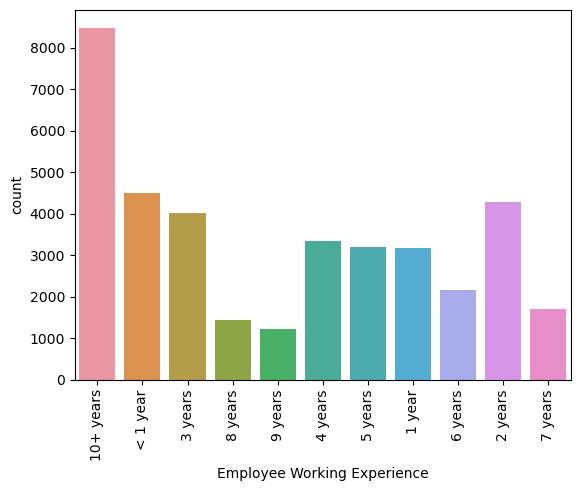

In [33]:
sns.countplot(x='emp_length', data=df)
plt.xlabel('Employee Working Experience')
plt.xticks(rotation=90)
plt.show()

most of the load are given to the experience with 10yeare.

In [34]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

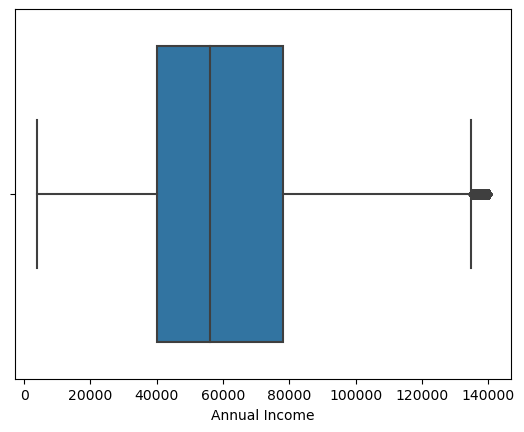

In [35]:
sns.boxplot(x=df['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

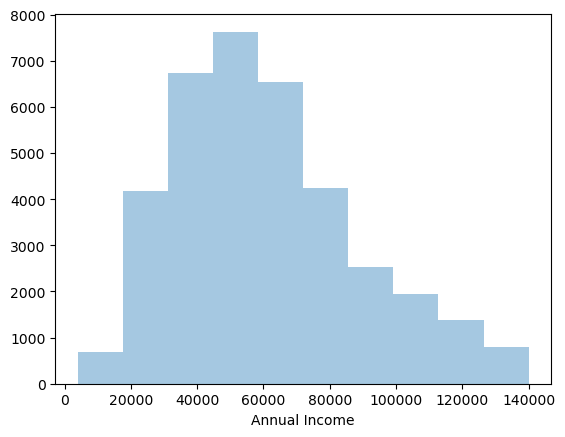

In [36]:
sns.distplot(df['annual_inc'], bins=10,kde=False)
plt.xlabel('Annual Income')
plt.show()

most the income lies in the 30000-70000 who is applied for loan

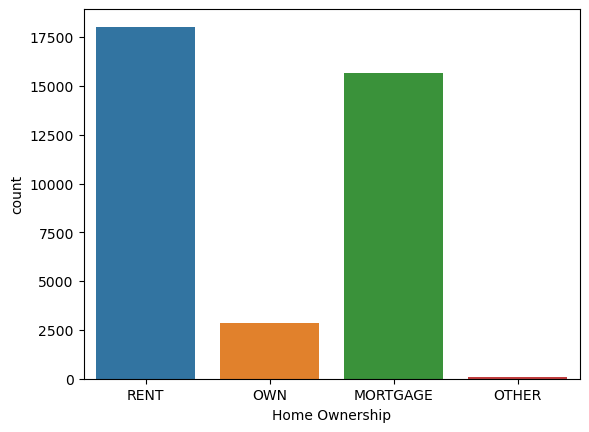

In [37]:
sns.countplot(x='home_ownership', data=df)
plt.xlabel('Home Ownership')
plt.show()

most of the loan is taken by the person who is living in the rented house.

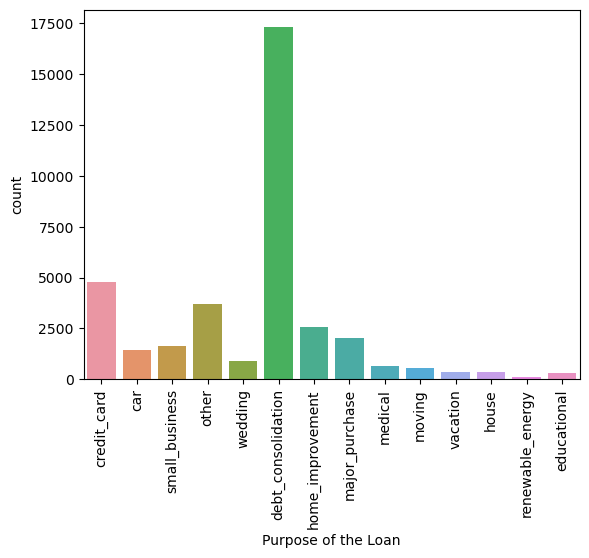

In [38]:
sns.countplot(x='purpose', data=df )
plt.xticks(rotation=90)
plt.xlabel('Purpose of the Loan')
plt.show()

purpose of the load for most the people is debt_consolidation.

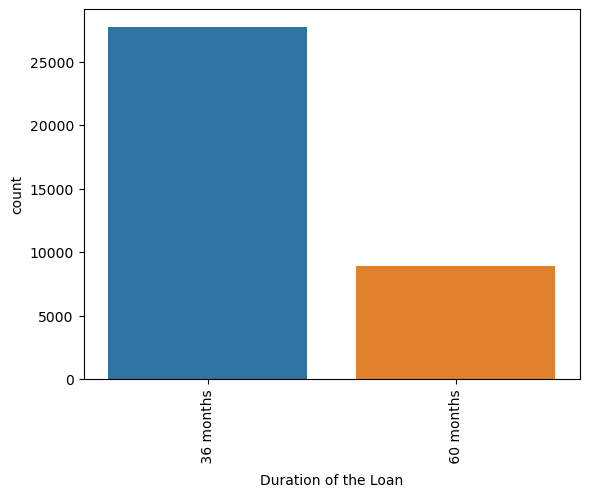

In [39]:
sns.countplot(x='term', data=df )
plt.xticks(rotation=90)
plt.xlabel('Duration of the Loan')
plt.show()

most of the loan duration is the 36months

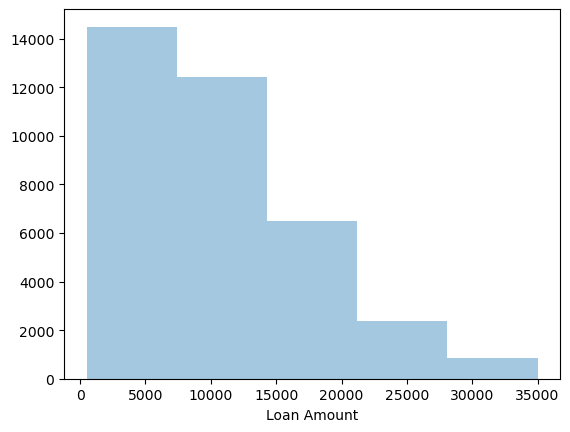

In [40]:
sns.distplot(df.loan_amnt, bins=5,kde=False)
plt.xlabel('Loan Amount')
plt.show()

most of the loan amount is range of 5000-10000.

### Bivariate Analysis

Let's look at the columns `loan_amnt` and `term` to see if there is any notable relation between the two

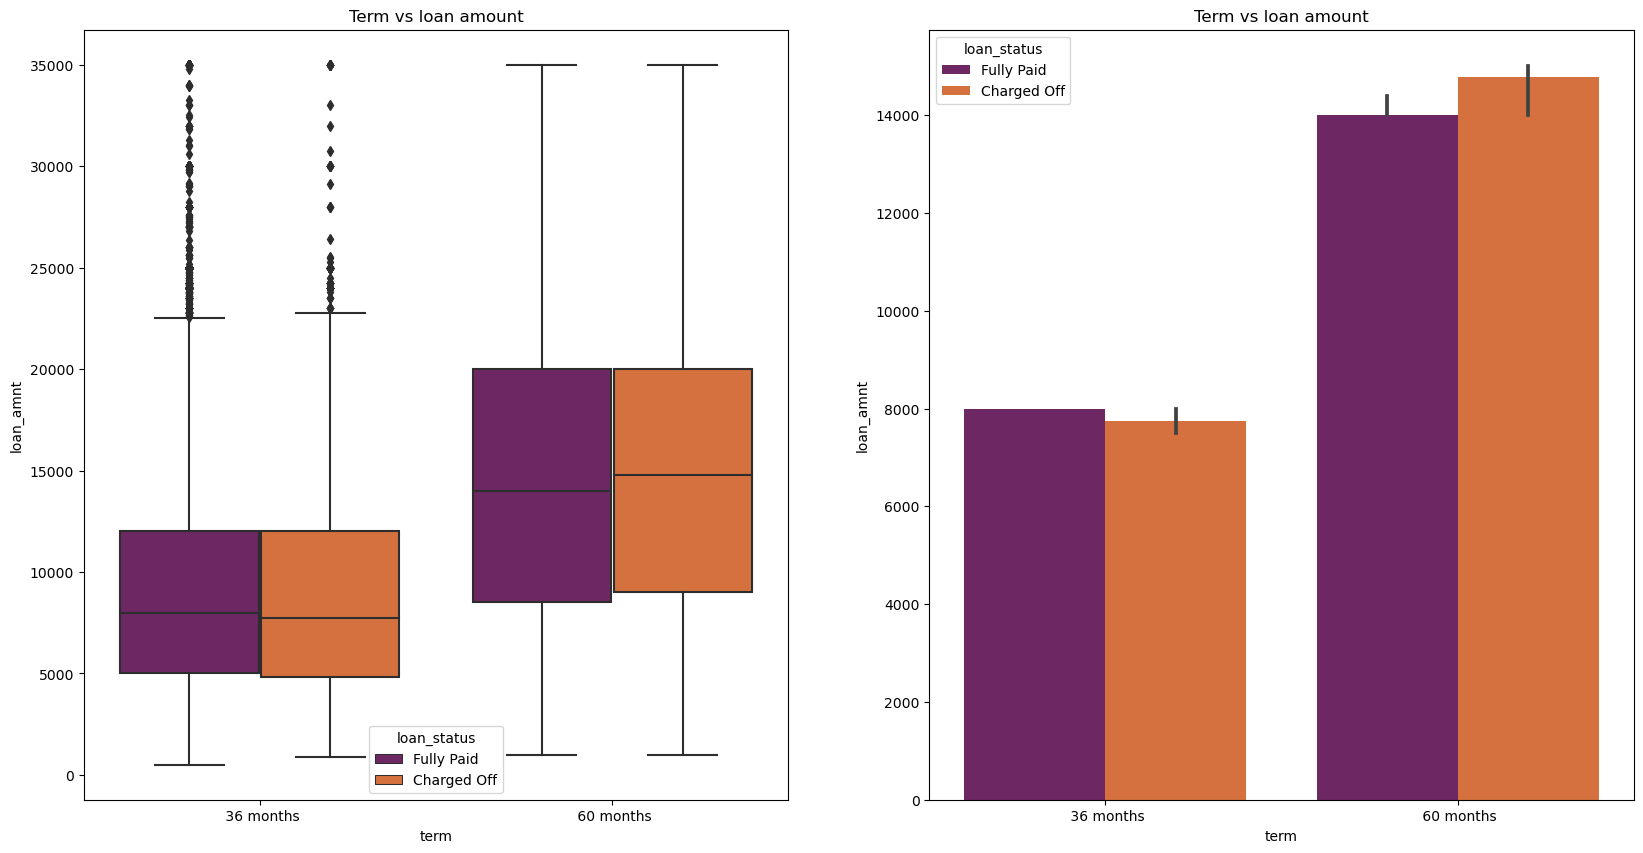

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df, palette="inferno")
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=df, estimator=np.median, palette="inferno")
plt.title('Term vs loan amount')
plt.show()

Seems like the loan amount does not provide a clear margin of evaluation. Both fully paid off and charged off borrowers have similar distributions across 36 and 60 month terms

<hr>

What about the effect of interest rate on the term?

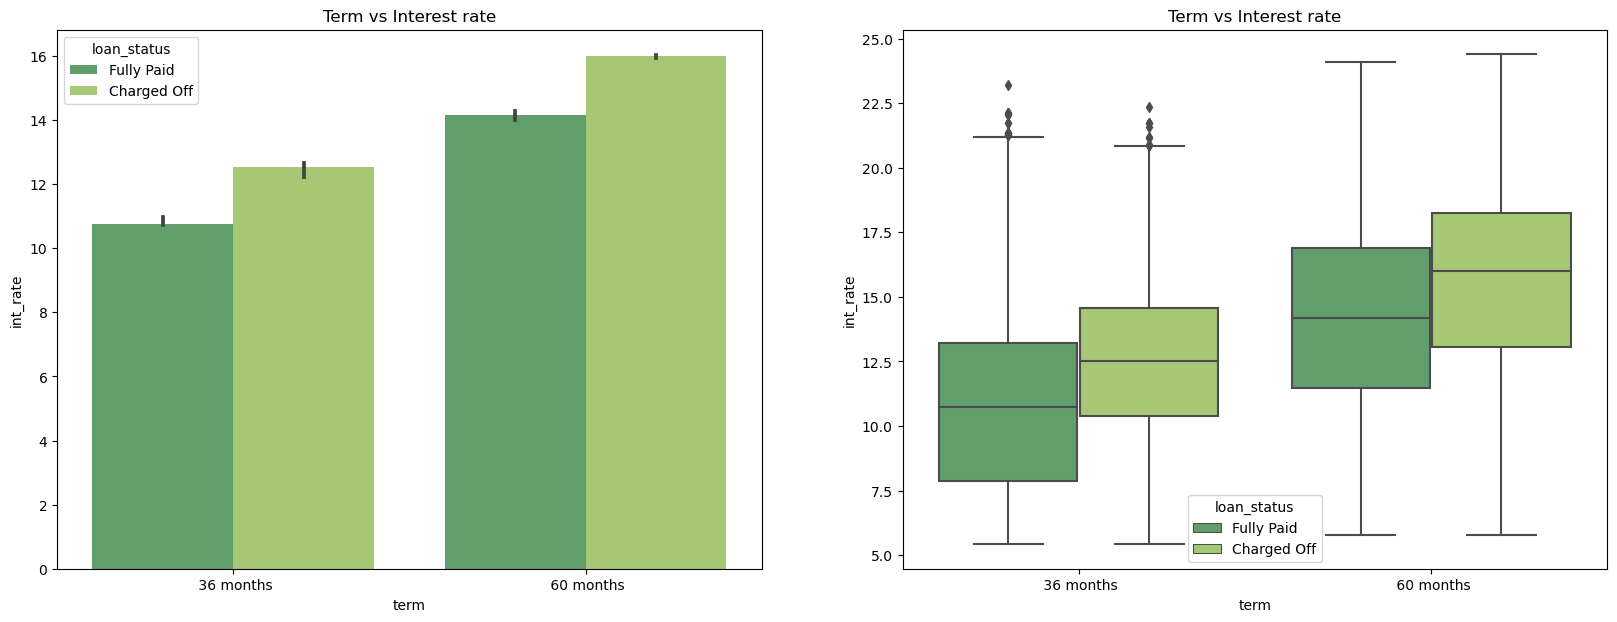

In [42]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=df, estimator=np.median, palette="summer")
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=df, palette="summer")
plt.title('Term vs Interest rate')
plt.show()

Seems like the default rate is slightly higher for higher interest rates.

<hr>

`dti` is defined as the ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

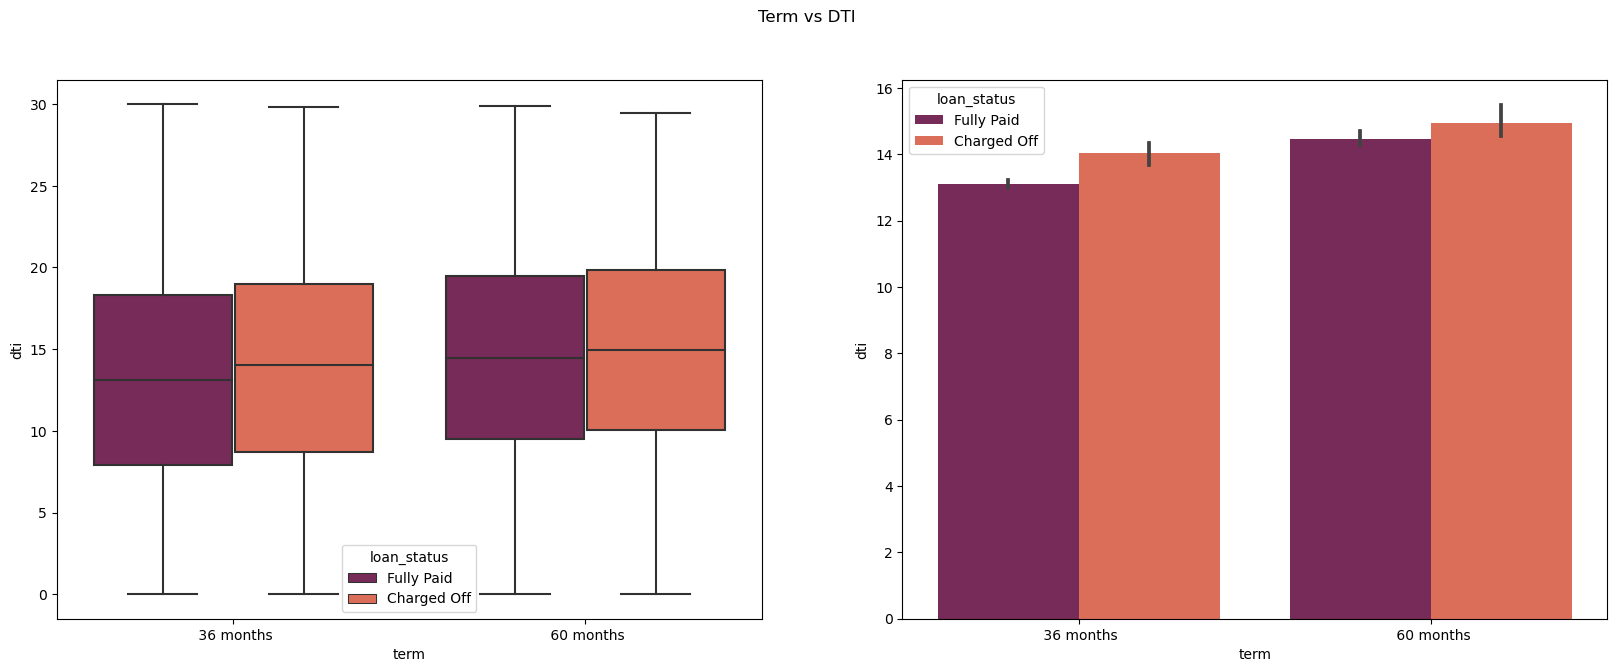

In [43]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=df, palette="rocket")
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=df, estimator=np.median, palette="rocket")
plt.suptitle('Term vs DTI')
plt.show()

Although the `dti` seems to be generally a little higher for longer term borrowers, it doesn't provide a significant metric.

<hr>

Let's have a look at the `grade` column. `grade` defines the grade assigned to the loan by the lending club.

In [44]:
#Sorting Grades from A to G
grade_ord = df.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

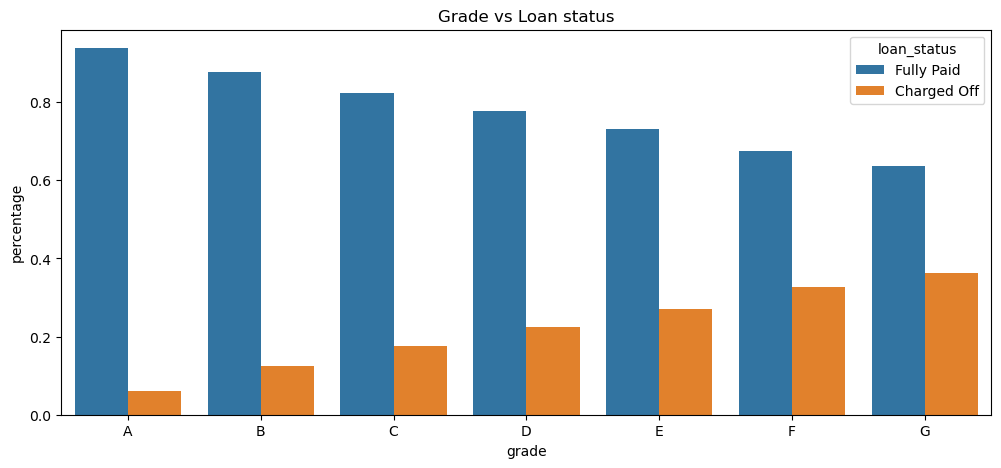

In [45]:
data = df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
data['percentage'] = data.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=data, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

From this observation, we notice that as the grade decreases, the percentage of charged off borrower increases.<hr> What could be the reason for this?

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

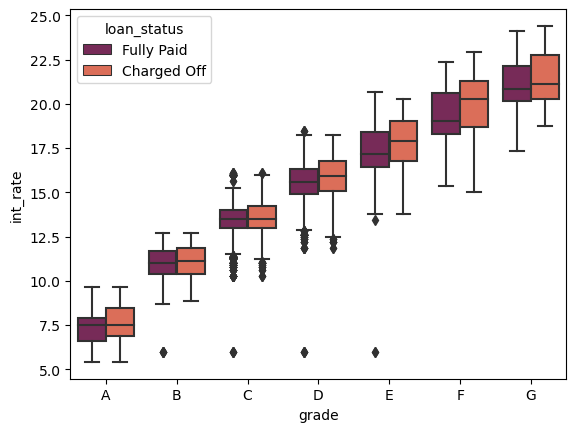

In [46]:
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=df, palette="rocket", order=grade_ord)

Looks like as the grade of the loan decreases, the interest rate increases. Could the interest rate have an effect on the loan status?

In [47]:
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<Figure size 640x480 with 0 Axes>

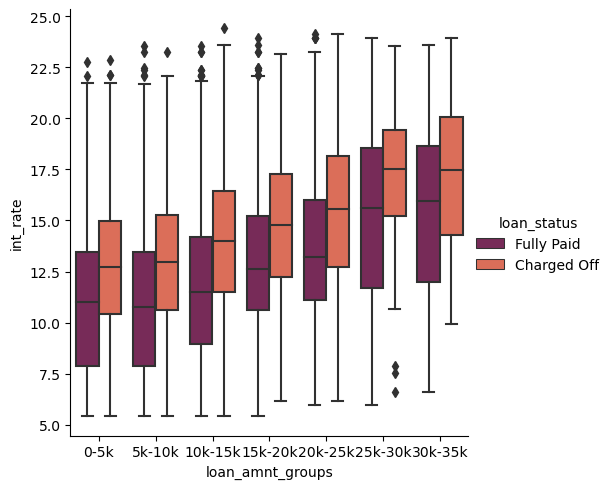

In [48]:
plt.tight_layout()
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="rocket",kind = 'box')

***Borrowers who have request for higher loan amonunts depicted by the `loan_amnt_groups` have to pay off thir debts at a higher interest rate depicted by `int_rate`. <br> This may lead to a higher chance to default. <hr>***

Text(0.5, 1.0, 'Home Ownership vs Loan status')

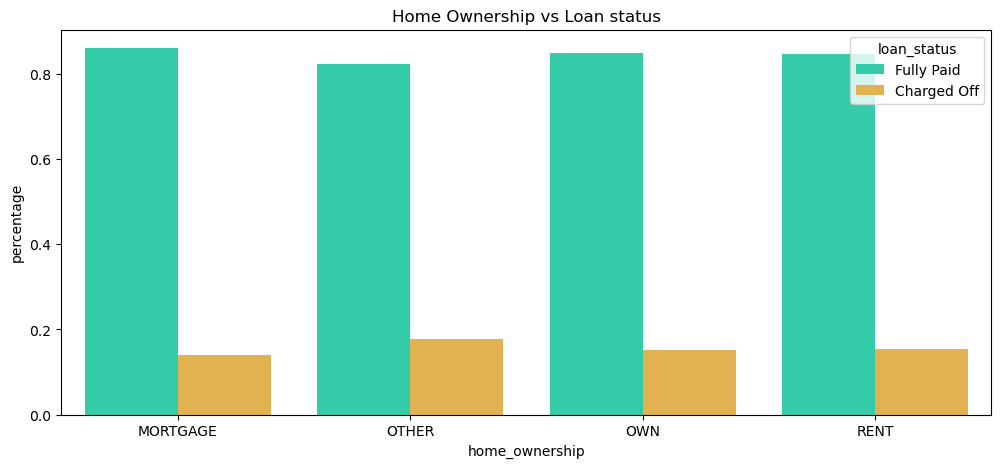

In [53]:
data = df.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
data['percentage'] = data.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=data, hue_order = ['Fully Paid', 'Charged Off'], palette='turbo')
plt.title('Home Ownership vs Loan status')

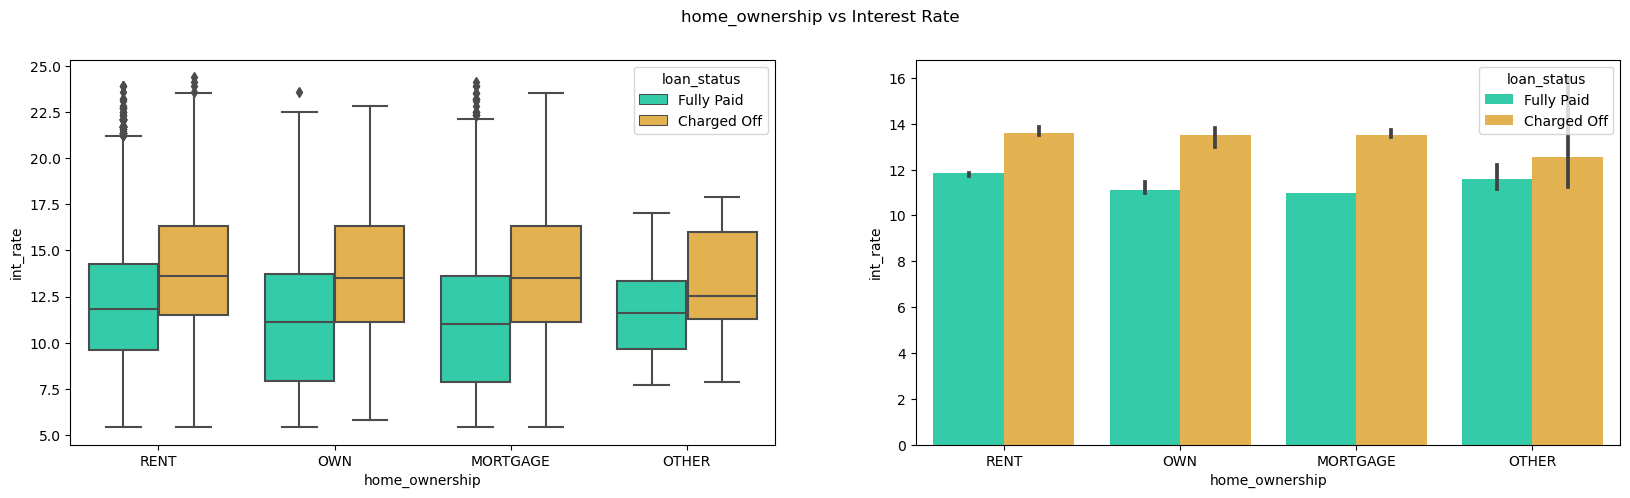

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=df, palette='turbo')
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=df, estimator=np.median, palette='turbo')
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

Irrespective of home ownership, higher the interest rate led to higher defaults

Let's have a look at the loctions where the loans were issued for both fully paid and charged off loans

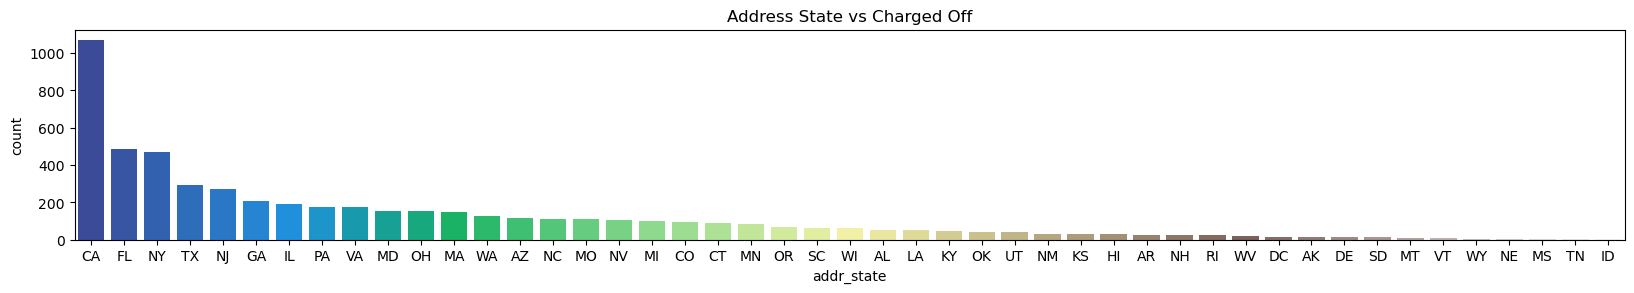

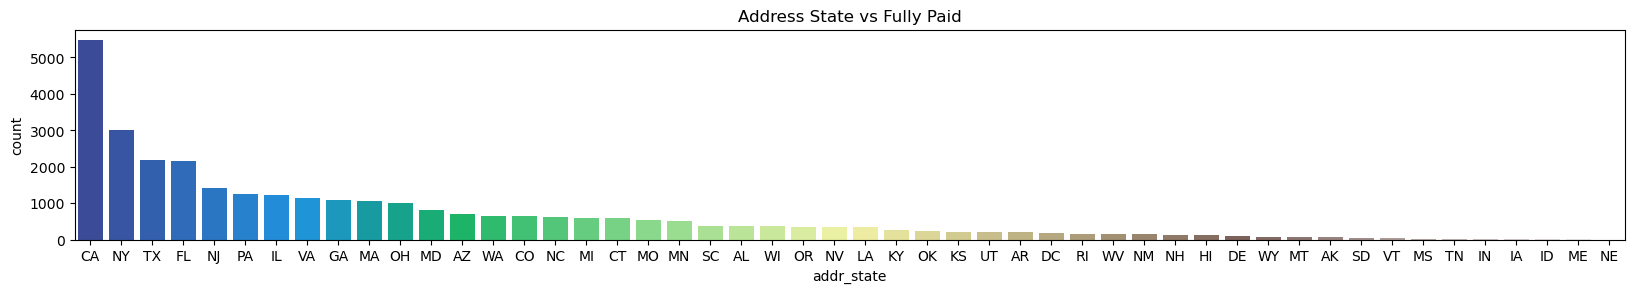

In [56]:
charged_off_df = df[df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index, palette='terrain')
plt.title('Address State vs Charged Off')

fp_df = df[df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index, palette='terrain')
plt.title('Address State vs Fully Paid')
plt.show()

Seems like in general, there are more borrowers from states of CA, FL, NY and TX <hr>

Let's analyse the loan `purpose` field

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

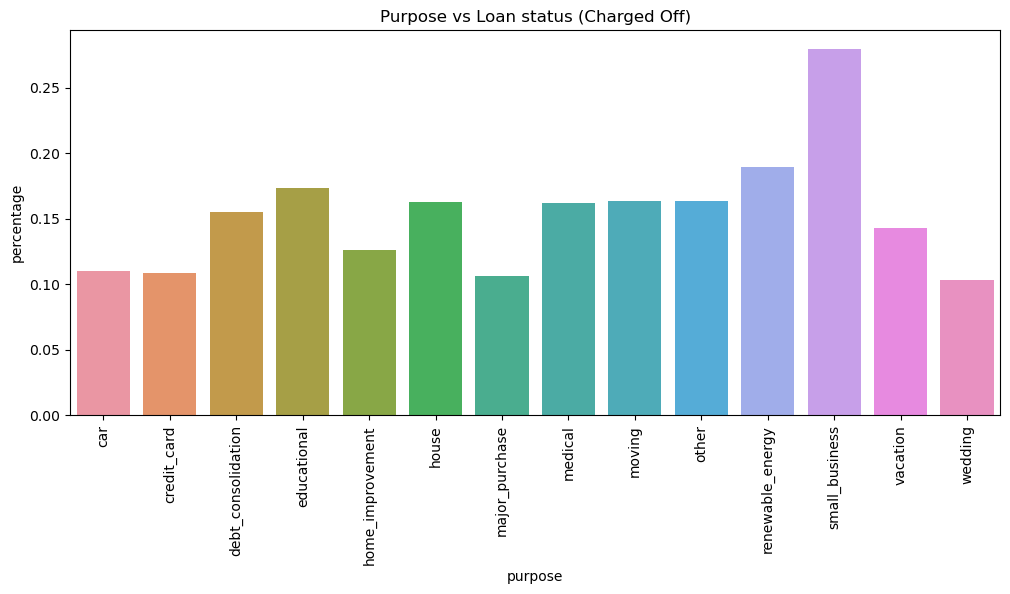

In [57]:
data = df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
data['percentage'] = data.groupby('purpose').transform(lambda x: x/x.sum())
data = data[data.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=data)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

There seem to be a higher percentage of charged off loans for small businesses <br> Let's look at small businesses a little more

<Figure size 640x480 with 0 Axes>

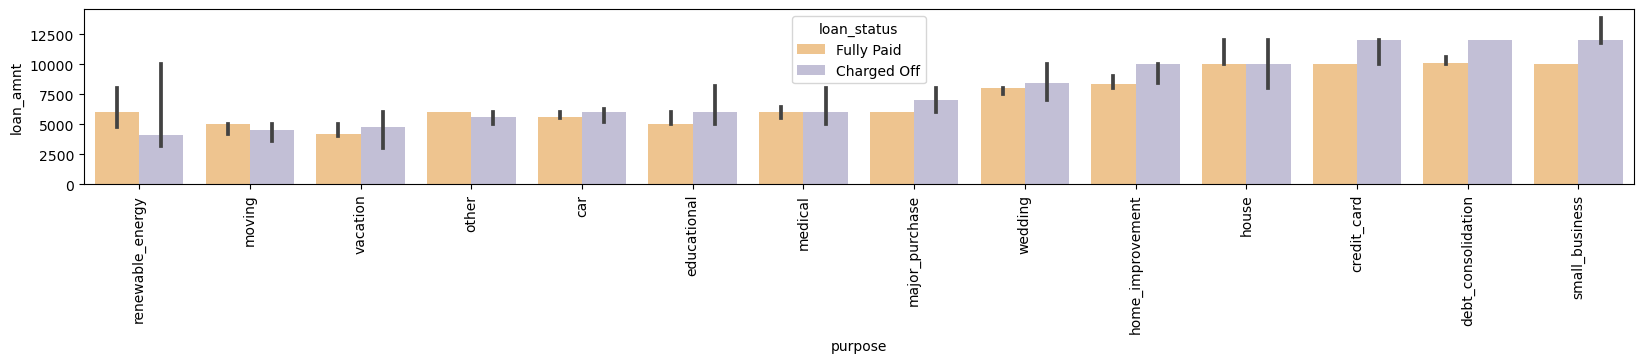

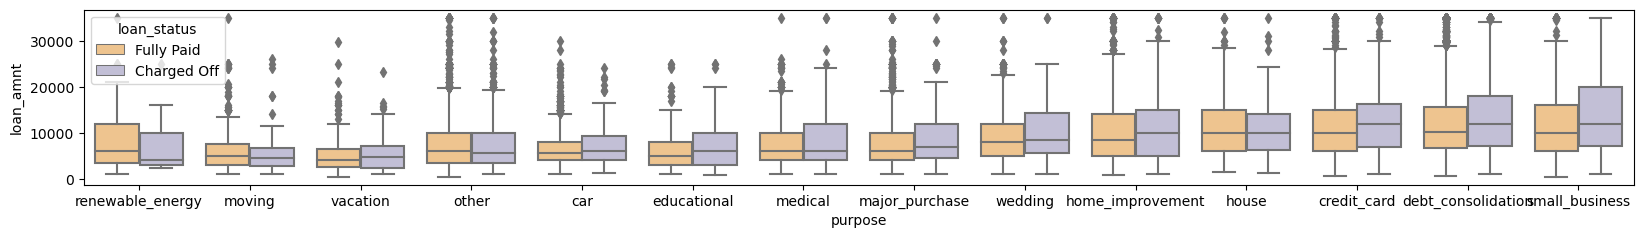

In [59]:
data = df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=data[data.loan_status == 'Charged Off'].sort_values(by='loan_amnt',).purpose, estimator=np.median, palette='PuOr')
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= df, order=data[data.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, palette='PuOr')
plt.show()

Small businesses seem to have higher defaults when the loan amount is high.

<Figure size 640x480 with 0 Axes>

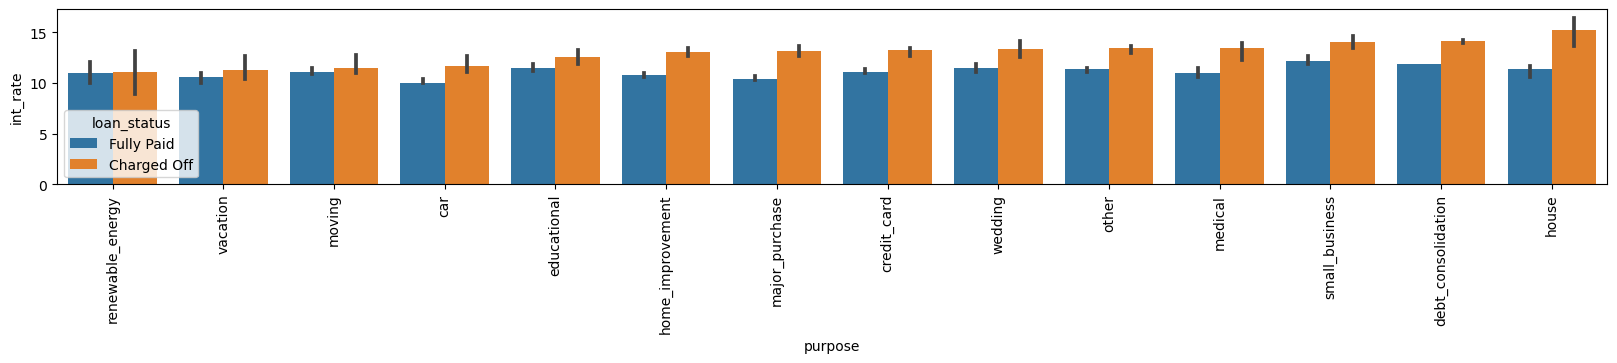

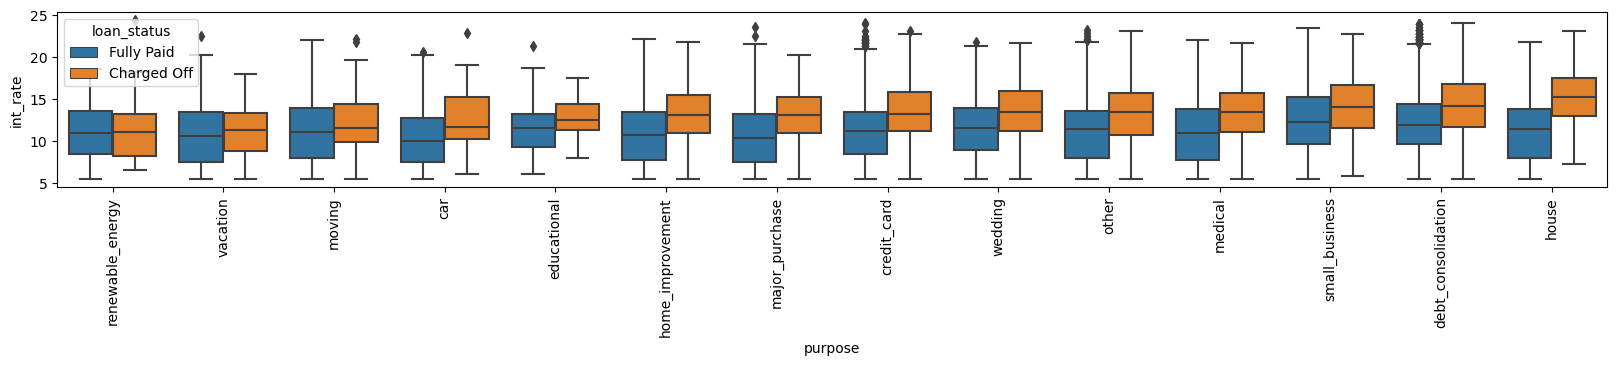

In [60]:
data = df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = data[data.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= df, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= df, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

From this chart, home loans with a high interest rate tend to default more often<br>

# Observation


 - Borrowers who have request for higher loan amonunts have to pay off thir debts at a higher interest rate tend to default
 -
 -
 -